In [10]:
import os
import random
from sklearn.model_selection import train_test_split

data_dir = "C:/Users/tklut/Downloads/data_folder-20230428T210749Z-001/data_folder"
emotions = ["angry", "fear", "happy", "sad"]
angry_train, angry_test = [], []
fear_train, fear_test = [], []
happy_train, happy_test = [], []
sad_train, sad_test = [], []

for emotion in emotions:
    # Get all audio files for the current emotion
    audio_files = [os.path.join(data_dir, emotion, f) for f in os.listdir(os.path.join(data_dir, emotion)) if f.endswith(".wav")]
    # Split the audio files into training and testing sets
    train_files, test_files = train_test_split(audio_files, train_size=0.7, test_size=0.3, random_state=42)
    # Add the training and testing sets to the respective lists
    if emotion == "angry":
        angry_train.extend([(f, emotion) for f in train_files])
        angry_test.extend([(f, emotion) for f in test_files])
    elif emotion == "fear":
        fear_train.extend([(f, emotion) for f in train_files])
        fear_test.extend([(f, emotion) for f in test_files])
    elif emotion == "happy":
        happy_train.extend([(f, emotion) for f in train_files])
        happy_test.extend([(f, emotion) for f in test_files])
    elif emotion == "sad":
        sad_train.extend([(f, emotion) for f in train_files])
        sad_test.extend([(f, emotion) for f in test_files])

        
print("Size of train vectors:")
print("Angry: ", len(angry_train))
print("Happy: ", len(happy_train))
print("Sad: ", len(sad_train))
print("Fear: ", len(fear_train))


print("\nSize of test vectors:")
print("Angry: ", len(angry_test))
print("Happy: ", len(happy_test))
print("Sad: ", len(sad_test))
print("Fear: ", len(fear_test))

Size of train vectors:
Angry:  70
Happy:  70
Sad:  70
Fear:  70

Size of test vectors:
Angry:  30
Happy:  30
Sad:  30
Fear:  30


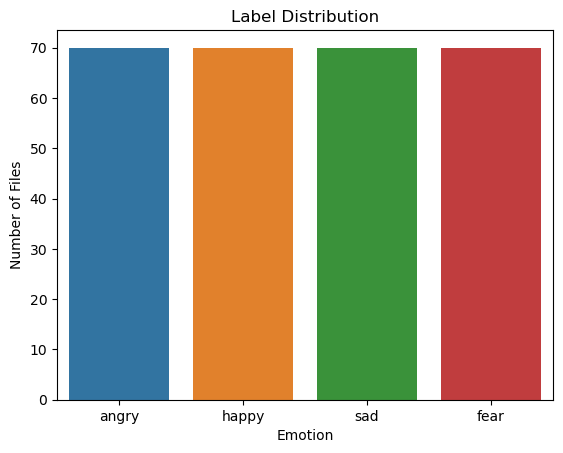

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of labels
labels = ["angry", "happy", "sad", "fear"]

# Count the number of files in each label
counts = [len(angry_train), len(happy_train), len(sad_train), len(fear_train)]

# Create a bar chart
sns.barplot(x=labels, y=counts)
plt.title("Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Files")
plt.show()

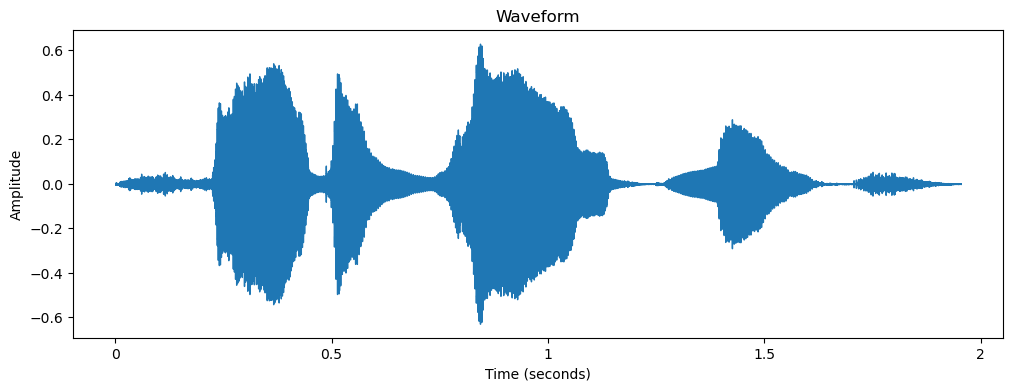

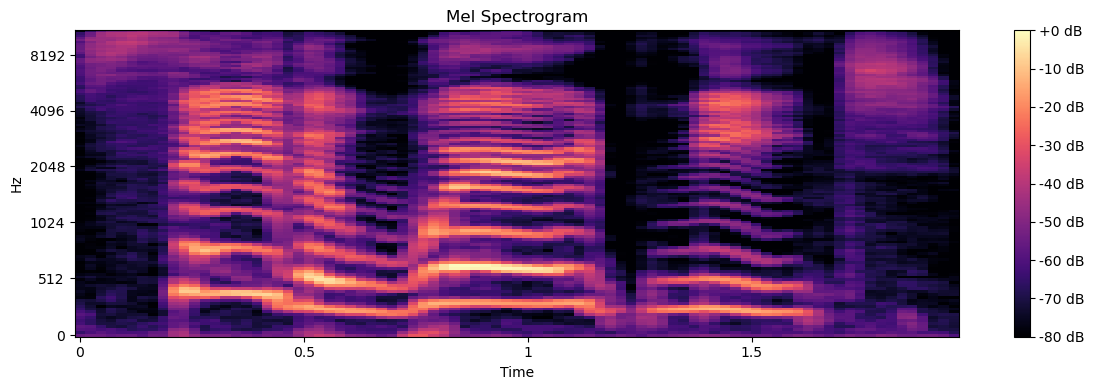

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
filename = happy_train[0][0]
y, sr = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Compute and plot the spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()



In [36]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extract_angry(file_path):
    #load audio files from train
    signal, sample_rate = librosa.load(file_path)

    #audio feature extraction:loudness
    df_loudness=pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    #print(rms[0])
    df_loudness['Loudness'] = rms[0]
    #print(df_loudness.head(5))

    #audio feature extraction: mel-frequency cepstral coefficients
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        #print(df_mfccs.head(5))
    
    #audio feature extraction: zero crossing rate
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    #print(df_zero_crossing_rate.head(5))

    #audio feature extraction:chroma
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    #print(df_chroma.head(5))


    #audio feature extraction: mel spectrogram
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    #print(df_mel_spectrogram.head(5))
    
    #combine all features
    angry_feature_matrix=pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    return angry_feature_matrix

#call function on angry_train vector
angry_features = []
for file_path in angry_train:
    features = extract_angry(file_path[0])
    angry_features.append(features)
    
angry_df = pd.concat(angry_features)
print(angry_df.head(5))   

#call angry on test
angry_features_test = []
for file_path in angry_test:
    features = extract_angry(file_path[0])
    angry_features_test.append(features)
    
angry_df_test = pd.concat(angry_features_test)
print(angry_df_test.head(5))   
    

def extract_sad(file_path):
    #load audio files from train
    signal, sample_rate = librosa.load(file_path)

    #audio feature extraction:loudness
    df_loudness=pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    #print(rms[0])
    df_loudness['Loudness'] = rms[0]
    #print(df_loudness.head(5))

    #audio feature extraction: mel-frequency cepstral coefficients
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        #print(df_mfccs.head(5))
    
    #audio feature extraction: zero crossing rate
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    #print(df_zero_crossing_rate.head(5))

    #audio feature extraction:chroma
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    #print(df_chroma.head(5))


    #audio feature extraction: mel spectrogram
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    #print(df_mel_spectrogram.head(5))
    
    #combine all features
    sad_feature_matrix=pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    return sad_feature_matrix

#call function on sad_train vector
sad_features = []
for file_path in sad_train:
    features = extract_sad(file_path[0])
    sad_features.append(features)
    
sad_df = pd.concat(sad_features)
print(sad_df.head(5)) 

#call sad on test
sad_features_test = []
for file_path in sad_test:
    features = extract_sad(file_path[0])
    sad_features_test.append(features)
    
sad_df_test = pd.concat(sad_features_test)
print(sad_df_test.head(5))   


def extract_happy(file_path):
    #load audio files from train
    signal, sample_rate = librosa.load(file_path)

    #audio feature extraction:loudness
    df_loudness=pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    #print(rms[0])
    df_loudness['Loudness'] = rms[0]
    #print(df_loudness.head(5))

    #audio feature extraction: mel-frequency cepstral coefficients
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        #print(df_mfccs.head(5))
    
    #audio feature extraction: zero crossing rate
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    #print(df_zero_crossing_rate.head(5))

    #audio feature extraction:chroma
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    #print(df_chroma.head(5))


    #audio feature extraction: mel spectrogram
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    #print(df_mel_spectrogram.head(5))
    
    #combine all features
    happy_feature_matrix=pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    return happy_feature_matrix

#call function on happy_train vector
happy_features = []
for file_path in happy_train:
    features = extract_happy(file_path[0])
    happy_features.append(features)
    
happy_df = pd.concat(happy_features)
print(happy_df.head(5))

#call happy on test
happy_features_test = []
for file_path in happy_test:
    features = extract_happy(file_path[0])
    happy_features_test.append(features)
    
happy_df_test = pd.concat(happy_features_test)
print(happy_df_test.head(5))   

def extract_fear(file_path):
    #load audio files from train
    signal, sample_rate = librosa.load(file_path)

    #audio feature extraction:loudness
    df_loudness=pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    #print(rms[0])
    df_loudness['Loudness'] = rms[0]
    #print(df_loudness.head(5))

    #audio feature extraction: mel-frequency cepstral coefficients
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
        #print(df_mfccs.head(5))
    
    #audio feature extraction: zero crossing rate
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    #print(df_zero_crossing_rate.head(5))

    #audio feature extraction:chroma
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    #print(df_chroma.head(5))


    #audio feature extraction: mel spectrogram
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    #print(df_mel_spectrogram.head(5))
    
    #combine all features
    fear_feature_matrix=pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    return fear_feature_matrix

#call function on fear_train vector
fear_features = []
for file_path in fear_train:
    features = extract_fear(file_path[0])
    fear_features.append(features)
    
fear_df = pd.concat(fear_features)
print(fear_df.head(5)) 

#call angry on test
fear_features_test = []
for file_path in fear_test:
    features = extract_fear(file_path[0])
    fear_features_test.append(features)
    
fear_df_test = pd.concat(fear_features_test)
print(fear_df_test.head(5))   

   Loudness      MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5  \
0  0.001369 -449.140503 -349.488220 -326.302673 -336.356873 -347.529846   
1  0.007720  -28.482441  -75.923141 -101.507034 -110.060287 -112.721153   
2  0.015767   25.978104   39.067360   43.492683   44.411701   36.049492   
3  0.020276   24.644444   11.568295  -12.681858  -30.292324  -33.992439   
4  0.020883   -7.652701   -3.419040   -4.648701    3.572103   17.950882   

       MFCC_6      MFCC_7      MFCC_8      MFCC_9  ...  Mel_Spectrogram_3  \
0 -357.967926 -354.074829 -352.408752 -354.809387  ...           0.000206   
1 -114.964157 -107.978867 -107.608986 -108.883423  ...           0.000212   
2   31.755650   32.099644   35.756638   36.855606  ...           0.000197   
3  -32.431633  -32.580582  -30.053194  -31.528896  ...           0.000570   
4   21.547882   20.002907   20.871534   17.840601  ...           0.000330   

   Mel_Spectrogram_4  Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  \
0    

   Loudness      MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5  \
0  0.001770 -492.855499 -458.749725 -437.674835 -417.668854 -410.155426   
1  0.004472  -41.029976  -76.258102  -89.553375  -81.772255  -82.917709   
2  0.006563   74.055138   80.648987   68.456772   59.251335   48.082230   
3  0.008083    6.745158    0.430309  -13.168348  -21.029091  -18.383595   
4  0.008933   16.515980   17.384150   21.976650   25.771133   29.001232   

       MFCC_6      MFCC_7      MFCC_8      MFCC_9  ...  Mel_Spectrogram_3  \
0 -410.420746 -416.597839 -424.044250 -375.058136  ...           0.000115   
1  -80.690865  -72.253937  -75.215454  -37.939770  ...           0.000030   
2   38.551506   37.166901   28.886673   36.634521  ...           0.000014   
3  -23.370434  -21.248270  -14.970244  -11.148153  ...           0.000027   
4   27.950512   22.917248   24.912399   19.485758  ...           0.000030   

   Mel_Spectrogram_4  Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  \
0    

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
angry_scaled_features = scaler.fit_transform(angry_df)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
angry_scaled_features_test = scaler.fit_transform(angry_df_test)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
happy_scaled_features = scaler.fit_transform(happy_df)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
happy_scaled_features_test = scaler.fit_transform(happy_df_test)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
sad_scaled_features = scaler.fit_transform(sad_df)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
sad_scaled_features_test = scaler.fit_transform(sad_df_test)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
fear_scaled_features = scaler.fit_transform(fear_df)

# Assume 'features' is a pandas DataFrame containing the emotion features
scaler = MinMaxScaler(feature_range=(-1, 1))
fear_scaled_features_test = scaler.fit_transform(fear_df_test)


# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
angry_df = pd.DataFrame(angry_scaled_features, columns=features.columns)
angry_averaged_features = angry_df.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
angry_df_test = pd.DataFrame(angry_scaled_features_test, columns=features.columns)
angry_averaged_features_test = angry_df_test.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
happy_df = pd.DataFrame(happy_scaled_features, columns=features.columns)
happy_averaged_features = happy_df.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
happy_df_test = pd.DataFrame(happy_scaled_features_test, columns=features.columns)
happy_averaged_features_test = happy_df_test.rolling(window_size, min_periods=1).mean()


# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
sad_df = pd.DataFrame(sad_scaled_features, columns=features.columns)
sad_averaged_features = sad_df.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
sad_df_test = pd.DataFrame(sad_scaled_features_test, columns=features.columns)
sad_averaged_features_test = sad_df_test.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
fear_df = pd.DataFrame(fear_scaled_features, columns=features.columns)
fear_averaged_features = fear_df.rolling(window_size, min_periods=1).mean()

# Assume 'scaled_features' is a pandas DataFrame containing the scaled emotion features
window_size = int(0.1 * 22050) # 100ms window size
fear_df_test = pd.DataFrame(fear_scaled_features_test, columns=features.columns)
fear_averaged_features_test = fear_df_test.rolling(window_size, min_periods=1).mean()

In [38]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Support Vector Machine Classifier
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True)


# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Gradient Boosting Machine Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()


# Assume 'angry_df', 'happy_df', 'sad_df', and 'fear_df' are pandas DataFrames containing the extracted features for each emotion

# Add a 'label' column to each emotion DataFrame
angry_averaged_features['label'] = 'angry'
happy_averaged_features['label'] = 'happy'
sad_averaged_features['label'] = 'sad'
fear_averaged_features['label'] = 'fear'

# Concatenate the emotion DataFrames into a single DataFrame
all_features = pd.concat([angry_averaged_features, happy_averaged_features, sad_averaged_features, fear_averaged_features], ignore_index=True)

# Split the concatenated DataFrame into X (features) and y (labels)
X = all_features.drop('label', axis=1)
y = all_features['label']

# Train your classifiers on the concatenated data
rf.fit(X, y)
svm.fit(X, y)
knn.fit(X, y)
dtc.fit(X, y)
gbm.fit(X, y)


GradientBoostingClassifier()

In [59]:
import pandas as pd
from sklearn.metrics import classification_report

# Assume 'vector' is a numpy array or a list
angry_df_test = pd.DataFrame(angry_averaged_features_test)
happy_df_test = pd.DataFrame(happy_averaged_features_test)
sad_df_test = pd.DataFrame(sad_averaged_features_test)
fear_df_test = pd.DataFrame(fear_averaged_features_test)

angry_df_test['label'] = 'angry'
happy_df_test['label'] = 'happy'
sad_df_test['label'] = 'sad'
fear_df_test['label'] = 'fear'

#combine all test 
all_test = pd.concat([angry_df_test, happy_df_test, sad_df_test, fear_df_test], ignore_index=True)
all_test.columns = all_test.columns.astype(str)

all_test_drop = all_test.drop(columns=["label"])




#predict
rf_test_preds = rf.predict(all_test_drop)
rf_test_preds_proba = rf.predict_proba(all_test_drop)
svm_test_preds = svm.predict(all_test_drop)
svm_test_preds_proba = svm.predict_proba(all_test_drop)

dtc_test_preds = dtc.predict(all_test_drop)
dtc_test_preds_proba = dtc.predict_proba(all_test_drop)
gbm_test_preds = gbm.predict(all_test_drop)
gbm_test_preds_proba = gbm.predict_proba(all_test_drop)

print(classification_report(all_test['label'], rf_test_preds))
print(classification_report(all_test['label'], svm_test_preds))
print(classification_report(all_test['label'], dtc_test_preds))
print(classification_report(all_test['label'], gbm_test_preds))

              precision    recall  f1-score   support

       angry       0.55      0.99      0.71      2775
        fear       0.99      1.00      0.99      2257
       happy       1.00      1.00      1.00      2542
         sad       1.00      0.26      0.41      2988

    accuracy                           0.79     10562
   macro avg       0.89      0.81      0.78     10562
weighted avg       0.88      0.79      0.75     10562

              precision    recall  f1-score   support

       angry       0.95      0.99      0.97      2775
        fear       0.99      0.94      0.96      2257
       happy       1.00      1.00      1.00      2542
         sad       1.00      1.00      1.00      2988

    accuracy                           0.98     10562
   macro avg       0.98      0.98      0.98     10562
weighted avg       0.98      0.98      0.98     10562

              precision    recall  f1-score   support

       angry       0.51      0.99      0.67      2775
        fear       0.